In [23]:
#!pip install spm1d
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
import pandas as pd
import csv
from scipy.ndimage import gaussian_filter
from scipy.signal import find_peaks 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib import cm
from scipy.signal import butter, filtfilt
import matplotlib.cm as cm
# import the required packages into the current environment
import sys, os
from matplotlib import pyplot
import spm1d
import glob
import re
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib import cm
from scipy.optimize import curve_fit
#import tensorflow as tf

In [24]:
def load_and_process_data(file_path):
    df = pd.read_excel(file_path)
    bb_knob_mean = np.array([df['bb_knob_x_mean'], df['bb_knob_y_mean'], df['bb_knob_z_mean']])
    bb_tip_mean = np.array([df['bb_tip_x_mean'], df['bb_tip_y_mean'], df['bb_tip_z_mean']])
    bb_knob_std = np.array([df['bb_knob_x_std'], df['bb_knob_y_std'], df['bb_knob_z_std']])
    bb_tip_std = np.array([df['bb_tip_x_std'], df['bb_tip_y_std'], df['bb_tip_z_std']])
    sb_knob_mean = np.array([df['sb_knob_x_mean'], df['sb_knob_y_mean'], df['sb_knob_z_mean']])
    sb_tip_mean = np.array([df['sb_tip_x_mean'], df['sb_tip_y_mean'], df['sb_tip_z_mean']])
    sb_knob_std = np.array([df['sb_knob_x_std'], df['sb_knob_y_std'], df['sb_knob_z_std']])
    sb_tip_std = np.array([df['sb_tip_x_std'], df['sb_tip_y_std'], df['sb_tip_z_std']])
    bb_bat_mean = (bb_tip_mean - bb_knob_mean).T
    sb_bat_mean = (sb_tip_mean - sb_knob_mean).T
    t = np.array(df['frames'])
    return bb_bat_mean, sb_bat_mean, t

# File paths
file_path_1 = 'C:/Users/Point Loma/Desktop/V3D Exports/bb_sb_swing.xlsx'
file_path_2 = 'Z:/V3D Exports/bb_sb_swing.xlsx'

# Load and process data from the first file path
# data_1 = load_and_process_data(file_path_1)

# Load and process data from the second file path
data_2 = load_and_process_data(file_path_2)

# You can now switch between data_1 and data_2 as needed


file_path_2 = 'Z:/V3D Exports/bb_sb_swing.xlsx'
bb_bat_mean, sb_bat_mean, t = load_and_process_data(file_path_2)

# Extract coordinates for baseball (bb) and softball (sb)
x_bb, y_bb, z_bb = bb_bat_mean.T
x_sb, y_sb, z_sb = sb_bat_mean.T

In [25]:

def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y
def unwrap_angle(rad):
    unwrapped = np.rad2deg(np.unwrap(rad))
    return unwrapped

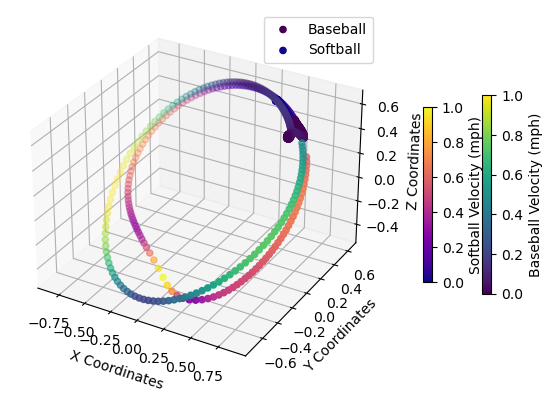

In [26]:
# Calculate velocity in m/s and convert it to mph for both bb and sb
velocity_mps_bb = np.sqrt(np.gradient(y_bb)**2 + np.gradient(z_bb)**2)
velocity_mph_bb = velocity_mps_bb * 2.23694
velocity_normalized_bb = (velocity_mph_bb - velocity_mph_bb.min()) / (velocity_mph_bb.max() - velocity_mph_bb.min())

velocity_mps_sb = np.sqrt(np.gradient(y_sb)**2 + np.gradient(z_sb)**2)
velocity_mph_sb = velocity_mps_sb * 2.23694
velocity_normalized_sb = (velocity_mph_sb - velocity_mph_sb.min()) / (velocity_mph_sb.max() - velocity_mph_sb.min())

# Initialize the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot initialization for both bb and sb with different color maps
sc_bb = ax.scatter(x_bb, y_bb, z_bb, c=velocity_normalized_bb, cmap=cm.viridis, label='Baseball')
sc_sb = ax.scatter(x_sb, y_sb, z_sb, c=velocity_normalized_sb, cmap=cm.plasma, label='Softball')

# Setting labels
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
ax.set_zlabel('Z Coordinates')

# Adding color bars for both bb and sb
cbar_bb = fig.colorbar(sc_bb, ax=ax, pad=0.1, fraction=0.02)
cbar_bb.set_label('Baseball Velocity (mph)')
cbar_sb = fig.colorbar(sc_sb, ax=ax, pad=0.1, fraction=0.02)
cbar_sb.set_label('Softball Velocity (mph)')

# Add legend
ax.legend()

# Update function for the animation
def update(frame):
    ax.view_init(elev=10, azim=frame)
    return sc_bb, sc_sb,

# Create animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50, blit=False)

# Show the animation
plt.show()

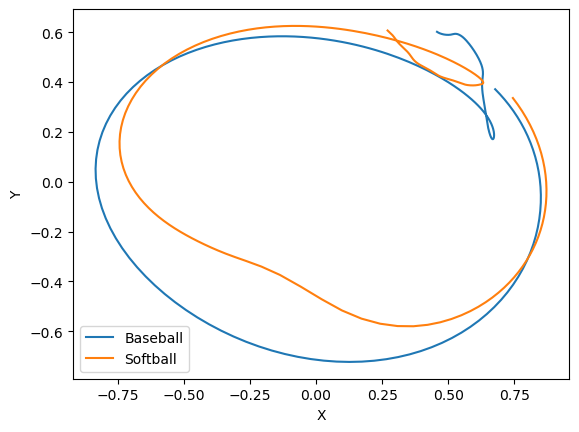

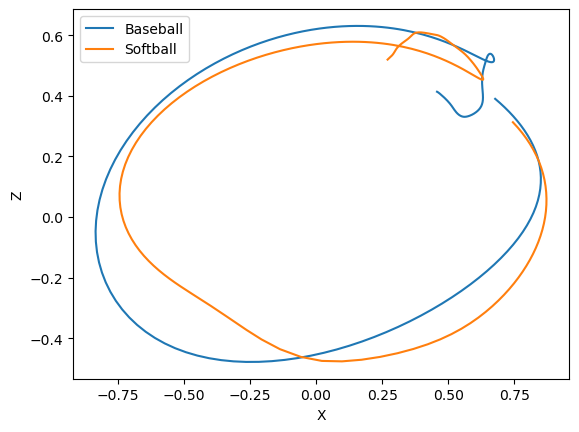

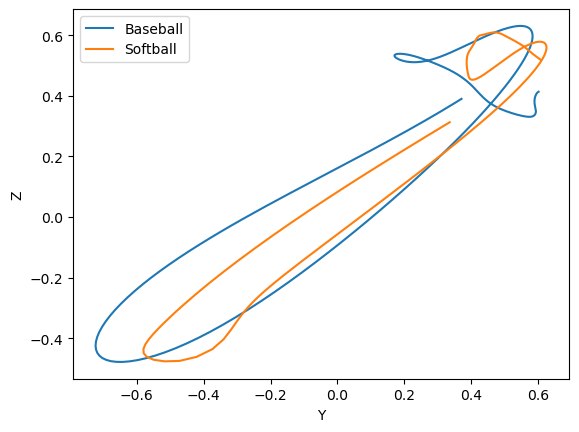

In [27]:

# Plot x vs y
plt.figure()
plt.plot(x_bb, y_bb, label='Baseball')
plt.plot(x_sb, y_sb, label='Softball')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Plot x vs z
plt.figure()
plt.plot(x_bb, z_bb, label='Baseball')
plt.plot(x_sb, z_sb, label='Softball')
plt.xlabel('X')
plt.ylabel('Z')
plt.legend()

# Plot y vs z
plt.figure()
plt.plot(y_bb, z_bb, label='Baseball')
plt.plot(y_sb, z_sb, label='Softball')
plt.xlabel('Y')
plt.ylabel('Z')
plt.legend()

plt.show()

C:\Users\Point Loma\AppData\Local\Temp\ipykernel_24748\64939416.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['270°', '315°', '0°', '45°', '90°', '135°', '180°', '225°'])
C:\Users\Point Loma\AppData\Local\Temp\ipykernel_24748\64939416.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['270°', '315°', '0°', '45°', '90°', '135°', '180°', '225°'])


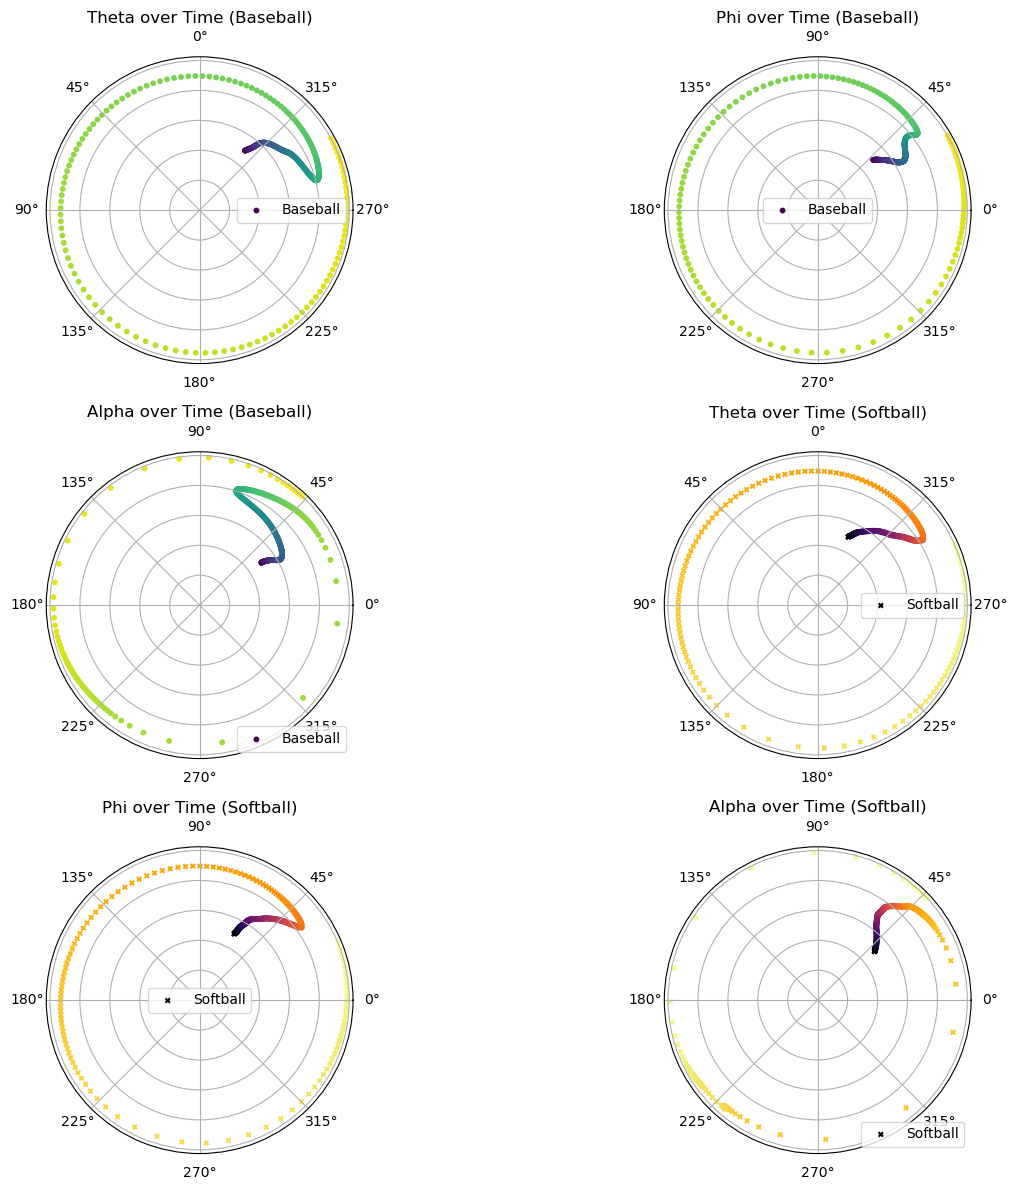

In [28]:
# Calculate angles for baseball
theta_rad_bb = np.arctan2(y_bb, x_bb)
theta_bb = np.degrees(theta_rad_bb)
phi_bb = np.degrees(np.arctan2(z_bb, x_bb))
alpha_bb = np.degrees(np.arctan2(z_bb, y_bb))

# Calculate angles for softball
theta_rad_sb = np.arctan2(y_sb, x_sb)
theta_sb = np.degrees(theta_rad_sb)
phi_sb = np.degrees(np.arctan2(z_sb, x_sb))
alpha_sb = np.degrees(np.arctan2(z_sb, y_sb))

# Normalize time for color mapping
normalized_time = (t - t.min()) / (t.max() - t.min())

# Dynamic radial values for better visualization
radial_values_theta = 0.5 + 0.5 * normalized_time
radial_values_phi = 0.5 + 0.5 * normalized_time
radial_values_alpha = 0.5 + 0.5 * normalized_time

# Create polar plots with color-coded time
plt.figure(figsize=(14, 12))

# Baseball plots
colors_bb = cm.viridis(normalized_time)

# Theta over Time for Baseball
ax1 = plt.subplot(321, projection='polar')
ax1.scatter(np.deg2rad(theta_bb), radial_values_theta, c=colors_bb, s=10, label='Baseball')
ax1.set_title('Theta over Time (Baseball)')
ax1.set_yticklabels([])
ax1.set_xticklabels(['270°', '315°', '0°', '45°', '90°', '135°', '180°', '225°'])
ax1.legend()

# Phi over Time for Baseball
ax2 = plt.subplot(322, projection='polar')
ax2.scatter(np.deg2rad(phi_bb), radial_values_phi, c=colors_bb, s=10, label='Baseball')
ax2.set_title('Phi over Time (Baseball)')
ax2.set_yticklabels([])
ax2.legend()

# Alpha over Time for Baseball
ax3 = plt.subplot(323, projection='polar')
ax3.scatter(np.deg2rad(alpha_bb), radial_values_alpha, c=colors_bb, s=10, label='Baseball')
ax3.set_title('Alpha over Time (Baseball)')
ax3.set_yticklabels([])
ax3.legend()

# Softball plots
colors_sb = cm.inferno(normalized_time)

# Theta over Time for Softball
ax4 = plt.subplot(324, projection='polar')
ax4.scatter(np.deg2rad(theta_sb), radial_values_theta, c=colors_sb, s=10, label='Softball', marker='x')
ax4.set_title('Theta over Time (Softball)')
ax4.set_yticklabels([])
ax4.set_xticklabels(['270°', '315°', '0°', '45°', '90°', '135°', '180°', '225°'])
ax4.legend()

# Phi over Time for Softball
ax5 = plt.subplot(325, projection='polar')
ax5.scatter(np.deg2rad(phi_sb), radial_values_phi, c=colors_sb, s=10, label='Softball', marker='x')
ax5.set_title('Phi over Time (Softball)')
ax5.set_yticklabels([])
ax5.legend()

# Alpha over Time for Softball
ax6 = plt.subplot(326, projection='polar')
ax6.scatter(np.deg2rad(alpha_sb), radial_values_alpha, c=colors_sb, s=10, label='Softball', marker='x')
ax6.set_title('Alpha over Time (Softball)')
ax6.set_yticklabels([])
ax6.legend()

plt.tight_layout()
plt.show()

C:\Users\Point Loma\AppData\Local\Temp\ipykernel_24748\1249468078.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['270°', '315°', '0°', '45°', '90°', '135°', '180°', '225°'])
C:\Users\Point Loma\AppData\Local\Temp\ipykernel_24748\1249468078.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['270°', '315°', '0°', '45°', '90°', '135°', '180°', '225°'])
c:\ProgramData\anaconda3\Lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


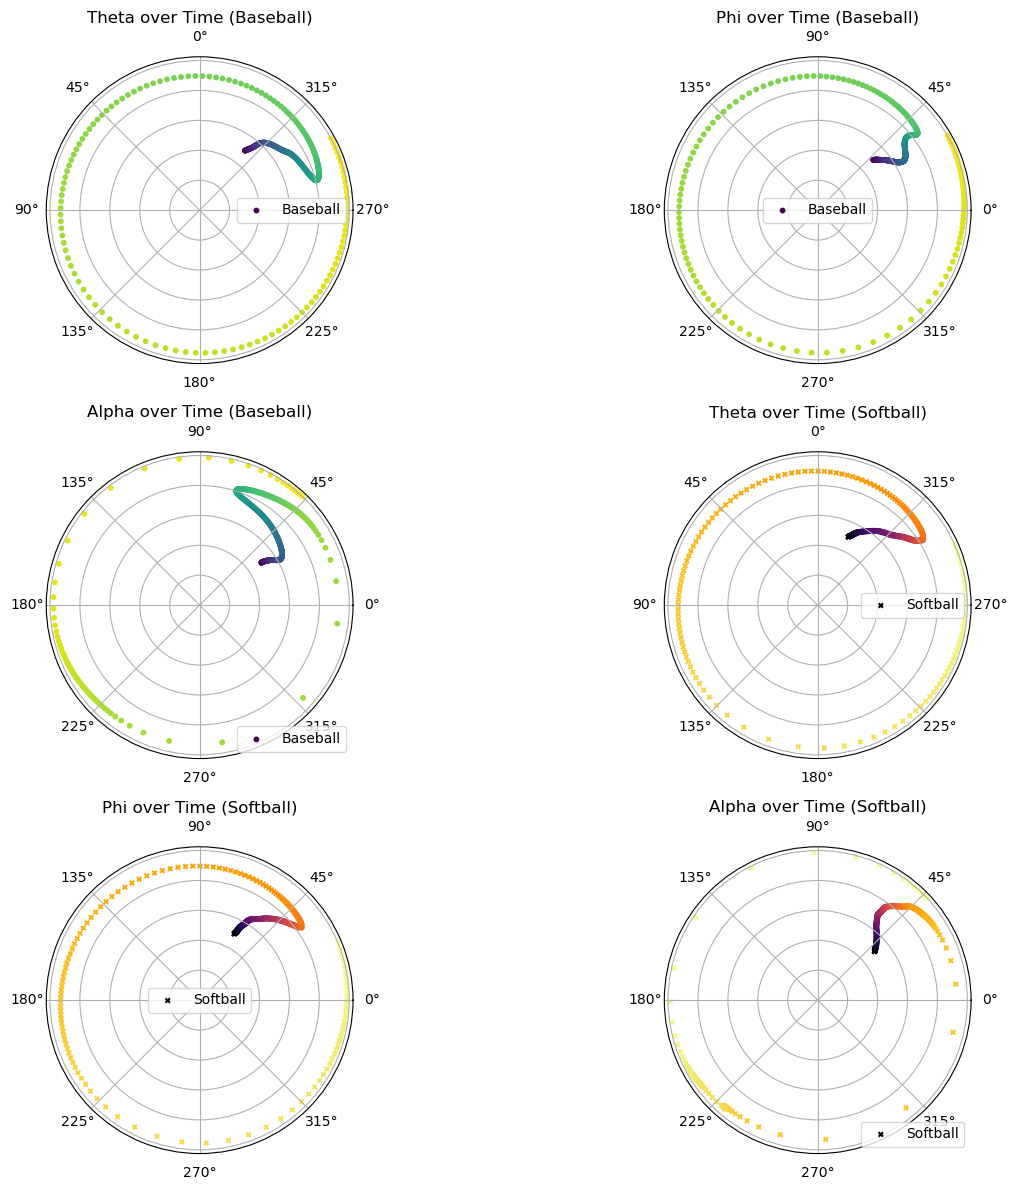

In [29]:
# Calculate angles for baseball
theta_rad_bb = np.arctan2(y_bb, x_bb)
theta_bb = np.degrees(theta_rad_bb)
phi_bb = np.degrees(np.arctan2(z_bb, x_bb))
alpha_bb = np.degrees(np.arctan2(z_bb, y_bb))

# Calculate angles for softball
theta_rad_sb = np.arctan2(y_sb, x_sb)
theta_sb = np.degrees(theta_rad_sb)
phi_sb = np.degrees(np.arctan2(z_sb, x_sb))
alpha_sb = np.degrees(np.arctan2(z_sb, y_sb))

# Normalize time for color mapping
normalized_time = (t - t.min()) / (t.max() - t.min())

# Dynamic radial values for better visualization
radial_values_theta = 0.5 + 0.5 * normalized_time
radial_values_phi = 0.5 + 0.5 * normalized_time
radial_values_alpha = 0.5 + 0.5 * normalized_time

# Create polar plots with color-coded time
plt.figure(figsize=(14, 12))

# Baseball plots
colors_bb = cm.viridis(normalized_time)

# Theta over Time for Baseball
ax1 = plt.subplot(321, projection='polar')
ax1.scatter(np.deg2rad(theta_bb), radial_values_theta, c=colors_bb, s=10, label='Baseball')
ax1.set_title('Theta over Time (Baseball)')
ax1.set_yticklabels([])
ax1.set_xticklabels(['270°', '315°', '0°', '45°', '90°', '135°', '180°', '225°'])
ax1.legend()

# Phi over Time for Baseball
ax2 = plt.subplot(322, projection='polar')
ax2.scatter(np.deg2rad(phi_bb), radial_values_phi, c=colors_bb, s=10, label='Baseball')
ax2.set_title('Phi over Time (Baseball)')
ax2.set_yticklabels([])
ax2.legend()

# Alpha over Time for Baseball
ax3 = plt.subplot(323, projection='polar')
ax3.scatter(np.deg2rad(alpha_bb), radial_values_alpha, c=colors_bb, s=10, label='Baseball')
ax3.set_title('Alpha over Time (Baseball)')
ax3.set_yticklabels([])
ax3.legend()

# Softball plots
colors_sb = cm.inferno(normalized_time)

# Theta over Time for Softball
ax4 = plt.subplot(324, projection='polar')
ax4.scatter(np.deg2rad(theta_sb), radial_values_theta, c=colors_sb, s=10, label='Softball', marker='x')
ax4.set_title('Theta over Time (Softball)')
ax4.set_yticklabels([])
ax4.set_xticklabels(['270°', '315°', '0°', '45°', '90°', '135°', '180°', '225°'])
ax4.legend()

# Phi over Time for Softball
ax5 = plt.subplot(325, projection='polar')
ax5.scatter(np.deg2rad(phi_sb), radial_values_phi, c=colors_sb, s=10, label='Softball', marker='x')
ax5.set_title('Phi over Time (Softball)')
ax5.set_yticklabels([])
ax5.legend()

# Alpha over Time for Softball
ax6 = plt.subplot(326, projection='polar')
ax6.scatter(np.deg2rad(alpha_sb), radial_values_alpha, c=colors_sb, s=10, label='Softball', marker='x')
ax6.set_title('Alpha over Time (Softball)')
ax6.set_yticklabels([])
ax6.legend()

plt.tight_layout()
plt.show()


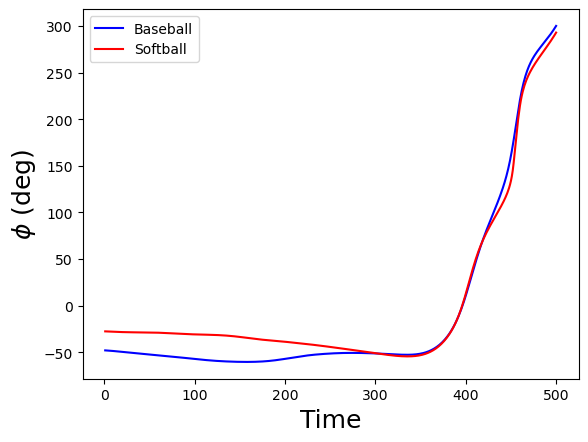

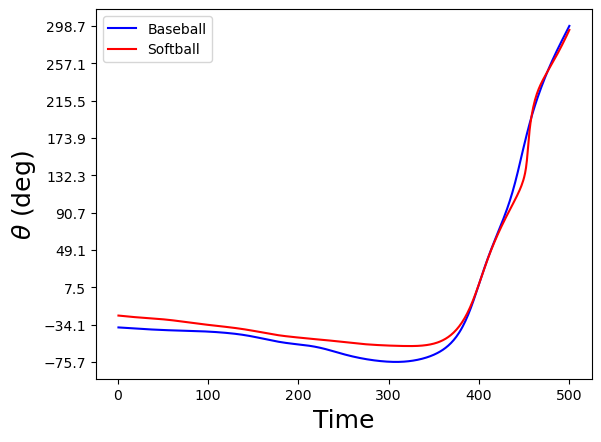

In [44]:

# Calculate angles for baseball
phi_bb = unwrap_angle(np.arctan2(z_bb, x_bb))
theta_bb = unwrap_angle(np.arctan2(y_bb, x_bb))

# Calculate angles for softball
phi_sb = unwrap_angle(np.arctan2(z_sb, x_sb))
theta_sb = unwrap_angle(np.arctan2(y_sb, x_sb))

# Plot phi for both baseball and softball
plt.figure()
plt.plot(t, phi_bb - 90, label='Baseball', color='blue')
plt.plot(t, phi_sb - 90, label='Softball', color='red')
plt.xlabel('Time', fontsize=18)
plt.ylabel(r'$\phi$ (deg)', fontsize=18)
plt.legend()
plt.show()

# Plot theta for both baseball and softball
plt.figure()
plt.plot(t, theta_bb - 90, label='Baseball', color='blue')
plt.plot(t, theta_sb - 90, label='Softball', color='red')
plt.xlabel('Time', fontsize=18)
plt.ylabel(r'$\theta$ (deg)', fontsize=18)

# Determine the range of your data and set y-ticks accordingly
theta_adjusted_bb = theta_bb - 90
theta_adjusted_sb = theta_sb - 90
y_min, y_max = min(np.min(theta_adjusted_bb), np.min(theta_adjusted_sb)), max(np.max(theta_adjusted_bb), np.max(theta_adjusted_sb))

# Create more y-ticks within the range
yticks = np.linspace(y_min, y_max, 10)  # Creates 10 evenly spaced ticks within the range

plt.yticks(yticks, fontsize=10)  # Apply these ticks with a specific font size
plt.legend()
plt.show()

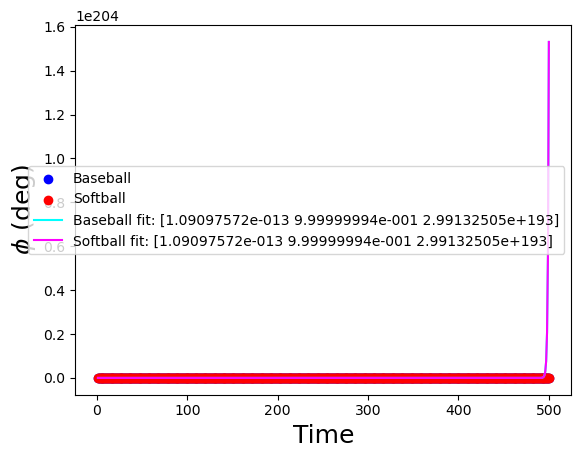

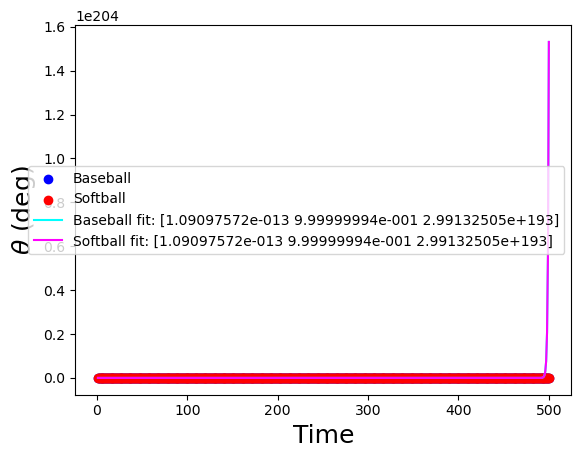

Parameters for phi (Baseball): [1.09097572e-013 9.99999994e-001 2.99132505e+193]
Parameters for phi (Softball): [1.09097572e-013 9.99999994e-001 2.99132505e+193]
Parameters for theta (Baseball): [1.09097572e-013 9.99999994e-001 2.99132505e+193]
Parameters for theta (Softball): [1.09097572e-013 9.99999994e-001 2.99132505e+193]


(495.0, 500.0)

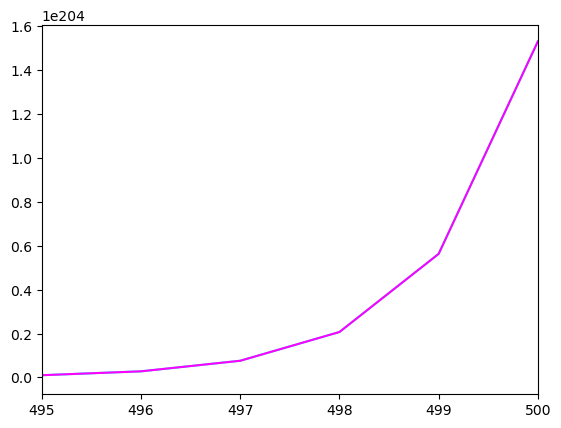

In [56]:


# Define exponential fitting function
def exponential_fit(x, a, b, c):
    return a * np.exp(b * x) + c

# Calculate angles for baseball
phi_bb = np.unwrap(np.arctan2(z_bb, x_bb)) * 180 / np.pi  # Convert radians to degrees
theta_bb = np.unwrap(np.arctan2(y_bb, x_bb)) * 180 / np.pi  # Convert radians to degrees

# Calculate angles for softball
phi_sb = np.unwrap(np.arctan2(z_sb, x_sb)) * 180 / np.pi  # Convert radians to degrees
theta_sb = np.unwrap(np.arctan2(y_sb, x_sb)) * 180 / np.pi  # Convert radians to degrees

# Adjust angles
phi_bb_adjusted = phi_bb - 90
phi_sb_adjusted = phi_sb - 90
theta_bb_adjusted = theta_bb - 90
theta_sb_adjusted = theta_sb - 90

# Scatter plot and exponential fit for phi
plt.figure()
plt.scatter(t, phi_bb_adjusted, label='Baseball', color='blue')
plt.scatter(t, phi_sb_adjusted, label='Softball', color='red')

# Fit exponential curves
params_bb_phi, _ = curve_fit(exponential_fit, t, phi_bb_adjusted)
params_sb_phi, _ = curve_fit(exponential_fit, t, phi_sb_adjusted)

# Plot fitted curves
plt.plot(t, exponential_fit(t, *params_bb_phi), label=f'Baseball fit: {params_bb_phi}', color='cyan') 
plt.plot(t, exponential_fit(t, *params_sb_phi), label=f'Softball fit: {params_sb_phi}' ,color='magenta')

plt.xlabel('Time', fontsize=18)
plt.ylabel(r'$\phi$ (deg)', fontsize=18)
plt.legend()
plt.show()

# Scatter plot and exponential fit for theta
plt.figure()
plt.scatter(t, theta_bb_adjusted, label='Baseball', color='blue')
plt.scatter(t, theta_sb_adjusted, label='Softball', color='red')

# Fit exponential curves
params_bb_theta, _ = curve_fit(exponential_fit, t, theta_bb_adjusted)
params_sb_theta, _ = curve_fit(exponential_fit, t, theta_sb_adjusted)

# Plot fitted curves
plt.plot(t, exponential_fit(t, *params_bb_theta), label=f'Baseball fit: {params_bb_theta}', color='cyan')
plt.plot(t, exponential_fit(t, *params_sb_theta), label=f'Softball fit: {params_sb_theta}', color='magenta')

plt.xlabel('Time', fontsize=18)
plt.ylabel(r'$\theta$ (deg)', fontsize=18)
plt.legend()
plt.show()

# Print parameters
print("Parameters for phi (Baseball):", params_bb_phi)
print("Parameters for phi (Softball):", params_sb_phi)
print("Parameters for theta (Baseball):", params_bb_theta)
print("Parameters for theta (Softball):", params_sb_theta)

plt.figure()
# Plot fitted curves
plt.plot(t, exponential_fit(t, *params_bb_theta), label=f'Baseball fit: {params_bb_theta}', color='cyan')
plt.plot(t, exponential_fit(t, *params_sb_theta), label=f'Softball fit: {params_sb_theta}', color='magenta')
plt.xlim(495,500)


In [11]:
# =========================
# VARIABLE 1
# =========================

alpha = 0.05
t1 = spm1d.stats.ttest2(theta_sb, theta_bb, equal_var=True)
ti1 = t1.inference(alpha, two_tailed=True, interp=True)
print(ti1)

#(2) Plot:
pyplot.close('all')
### plot mean and SD:
pyplot.figure(figsize=(8, 3.5))
ax1 = pyplot.axes((0.1, 0.15, 0.35, 0.8))
xpos = [50, 60]
spm1d.plot.plot_mean_sd(var1_group1, label='Group 1')
spm1d.plot.plot_mean_sd(var1_group2, label='Group 2', linecolor='r', facecolor='r', linestyle='--')
ax1.axhline(y=0, color='k', linestyle=':')
ax1.vlines(x=xpos, ymin=-25, ymax=40, color='k', linestyle='--', lw=1)
ax1.set_xlabel('% Motion Phase')
ax1.set_ylabel('Variable 1 (units)')
ax1.legend(fontsize=8, loc='upper left', frameon=False)
### plot SPM results:
ax1 = pyplot.axes((0.55, 0.15, 0.35, 0.8))
ti1.plot()
ti1.plot_threshold_label(fontsize=8)
ti1.plot_p_values(size=8, offset_all_clusters=(10, -0.6))
ax1.set_xlabel('% Motion Phase')
pyplot.show()

TypeError: SPM0D_T.inference() got an unexpected keyword argument 'interp'

In [16]:
import spm1d
# Calculate angles for baseball
phi_bb = unwrap_angle(np.arctan2(z_bb, x_bb))
theta_bb = unwrap_angle(np.arctan2(y_bb, x_bb))

# Calculate angles for softball
phi_sb = unwrap_angle(np.arctan2(z_sb, x_sb))
theta_sb = unwrap_angle(np.arctan2(y_sb, x_sb))

# Create synthetic example with multiple observations per condition
n_observations = 500  # Example number of observations
YB_theta = np.tile(theta_bb, (n_observations, 1))  # Baseball theta
YA_theta = np.tile(theta_sb, (n_observations, 1))  # Softball theta
YB_phi = np.tile(phi_bb, (n_observations, 1))  # Baseball phi
YA_phi = np.tile(phi_sb, (n_observations, 1))  # Softball phi

# Debug: Print data shapes and variances
print("YB_theta shape:", YB_theta.shape)
print("YA_theta shape:", YA_theta.shape)
print("YB_phi shape:", YB_phi.shape)
print("YA_phi shape:", YA_phi.shape)
print("Variance of YB_theta:", np.var(YB_theta))
print("Variance of YA_theta:", np.var(YA_theta))
print("Variance of YB_phi:", np.var(YB_phi))
print("Variance of YA_phi:", np.var(YA_phi))

# Ensure variances are not zero
if np.var(YB_theta) == 0 or np.var(YA_theta) == 0:
    raise ValueError("Zero variance detected in theta data.")
if np.var(YB_phi) == 0 or np.var(YA_phi) == 0:
    raise ValueError("Zero variance detected in phi data.")

# SPM Analysis for theta
alpha = 0.05
t_theta = spm1d.stats.ttest2(YB_theta, YA_theta, equal_var=True)
ti_theta = t_theta.inference(alpha, two_tailed=True)
print(ti_theta)

# SPM Analysis for phi
t_phi = spm1d.stats.ttest2(YB_phi, YA_phi, equal_var=True)
ti_phi = t_phi.inference(alpha, two_tailed=True)
print(ti_phi)

# Plotting SPM results for theta
plt.close('all')
plt.figure(figsize=(16, 7))

# Plot mean and SD for theta
ax1 = plt.axes((0.1, 0.55, 0.35, 0.35))
xpos = [50, 60]  # Example positions for events in the swing
spm1d.plot.plot_mean_sd(YB_theta, linecolor='b', facecolor='b', label='Baseball')
spm1d.plot.plot_mean_sd(YA_theta, linecolor='r', facecolor='r', linestyle='--', label='Softball')
ax1.axhline(y=0, color='k', linestyle=':')
ax1.vlines(x=xpos, ymin=-25, ymax=40, color='k', linestyle='--', lw=1)
ax1.text(-2, 26, 'SFC', fontsize=8)
ax1.text(45, 26, 'MER', fontsize=8)
ax1.text(59, 26, 'BR', fontsize=8)
ax1.text(97, 26, 'MIR', fontsize=8)
ax1.set_xlabel('% Swing Motion (Stance-FT)')
ax1.set_ylabel(r'Bat XY Angle $\theta$ (deg)')
ax1.legend(fontsize=8, loc='upper left', frameon=False)

# Plot SPM results for theta
ax2 = plt.axes((0.55, 0.55, 0.35, 0.35))
ti_theta.plot()
ti_theta.plot_threshold_label(fontsize=8)
ti_theta.plot_p_values(size=8, offset_all_clusters=(10, -0.6))
ax2.set_xlabel('% Swing Motion (Stance-FT)')

# Plot mean and SD for phi
ax3 = plt.axes((0.1, 0.05, 0.35, 0.35))
spm1d.plot.plot_mean_sd(YB_phi, linecolor='b', facecolor='b', label='Baseball')
spm1d.plot.plot_mean_sd(YA_phi, linecolor='r', facecolor='r', linestyle='--', label='Softball')
ax3.axhline(y=0, color='k', linestyle=':')
ax3.vlines(x=xpos, ymin=-25, ymax=40, color='k', linestyle='--', lw=1)
ax3.text(-2, 26, 'SFC', fontsize=8)
ax3.text(45, 26, 'MER', fontsize=8)
ax3.text(59, 26, 'BR', fontsize=8)
ax3.text(97, 26, 'MIR', fontsize=8)
ax3.set_xlabel('% Swing Motion (Stance-FT)')
ax3.set_ylabel(r'Bat XZ Angle $\phi$ (deg)')
ax3.legend(fontsize=8, loc='upper left', frameon=False)

# Plot SPM results for phi
ax4 = plt.axes((0.55, 0.05, 0.35, 0.35))
ti_phi.plot()
ti_phi.plot_threshold_label(fontsize=8)
ti_phi.plot_p_values(size=8, offset_all_clusters=(10, -0.6))
ax4.set_xlabel('% Swing Motion (Stance-FT)')

plt.tight_layout()
plt.show()

YB_theta shape: (500, 500)
YA_theta shape: (500, 500)
YB_phi shape: (500, 500)
YA_phi shape: (500, 500)
Variance of YB_theta: 9258.372172047742
Variance of YA_theta: 8110.736769601707
Variance of YB_phi: 9710.515220105835
Variance of YA_phi: 8146.146039718574


SPM1DError: 

Zero variance detected at the following nodes:

 [97, 137, 202, 351, 385, 486] 
